<a href="https://colab.research.google.com/github/fikriahmadsaputra/Data-Mining-/blob/main/UAS_Data_Mining_Fikri_Ahmad_Saputra_211011401465.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files

uploaded = files.upload()


df = pd.read_csv("retail_sales_dataset.csv")


df.head()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100


Accuracy: 0.33
Confusion Matrix:
 [[26 31 16]
 [21 27 12]
 [30 24 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.36      0.35        73
           1       0.33      0.45      0.38        60
           2       0.32      0.19      0.24        67

    accuracy                           0.33       200
   macro avg       0.33      0.33      0.32       200
weighted avg       0.33      0.33      0.32       200



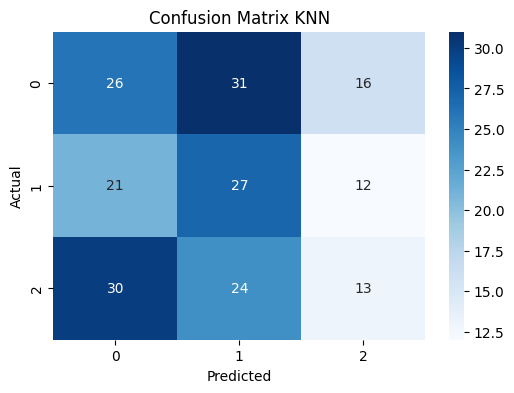

In [21]:
import pandas as pd
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as mp
import seaborn as sea


# label encoding kolom kategori
le_gender = LabelEncoder()
le_category = LabelEncoder()

# Fit le_gender and le_category on the original columns before transforming
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Product Category'] = le_category.fit_transform(df['Product Category']) # Use fit_transform here


# fitur dan target
X = df[['Gender', 'Age', 'Quantity', 'Price per Unit', 'Total Amount']]
y = df['Product Category']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# prediksi
y_pred = knn.predict(X_test)

# evaluasi
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Classification report without target_names to avoid previous error
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

# visualisasi
mp.figure(figsize=(6,4))
sea.heatmap(cm, annot=True, fmt='d', cmap='Blues')
mp.xlabel("Predicted")
mp.ylabel("Actual")
mp.title("Confusion Matrix KNN")
mp.show()